In [2]:
import time

notebook_start_time = time.time()

In [3]:
import sys
from pathlib import Path


def is_google_colab() -> bool:
    if "google.colab" in str(get_ipython()):
        return True
    return False


def clone_repository() -> None:
    !git clone https://github.com/XayHanmonty/smart-fit-recs.git
    %cd smart-fit-recs/


def install_dependencies() -> None:
    !pip install --upgrade uv
    !uv pip install --all-extras --system --requirement pyproject.toml


if is_google_colab():
    clone_repository()
    install_dependencies()

    root_dir = str(Path().absolute())
    print("⛳️ Google Colab environment")
else:
    root_dir = str(Path().absolute().parent)
    print("⛳️ Local environment")

# Add the root directory to the `PYTHONPATH` to use the `recsys` Python module from the notebook.
if root_dir not in sys.path:
    print(f"Adding the following directory to the PYTHONPATH: {root_dir}")
    sys.path.append(root_dir)

⛳️ Local environment
Adding the following directory to the PYTHONPATH: /Users/xayhanmonty/Desktop/smart-fit-recs


In [22]:
%load_ext autoreload
%autoreload 2

import warnings

warnings.filterwarnings("ignore")

from loguru import logger

from recsys import hopsworks_integration, training
from recsys.config import settings

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from pprint import pprint

pprint(dict(settings))

{'CUSTOMER_DATA_SIZE': <CustomerDatasetSize.SMALL: 'SMALL'>,
 'CUSTOM_HOPSWORKS_INFERENCE_ENV': 'custom_env_name',
 'FEATURES_EMBEDDING_MODEL_ID': 'all-MiniLM-L6-v2',
 'HOPSWORKS_API_KEY': SecretStr('**********'),
 'OPENAI_API_KEY': SecretStr('**********'),
 'OPENAI_MODEL_ID': 'gpt-4o-mini',
 'RANKING_EARLY_STOPPING_ROUNDS': 5,
 'RANKING_ITERATIONS': 100,
 'RANKING_LEARNING_RATE': 0.2,
 'RANKING_MODEL_TYPE': 'ranking',
 'RANKING_SCALE_POS_WEIGHT': 10,
 'RECSYS_DIR': PosixPath('/Users/xayhanmonty/Desktop/smart-fit-recs/recsys'),
 'TWO_TOWER_DATASET_TEST_SPLIT_SIZE': 0.1,
 'TWO_TOWER_DATASET_VALIDATON_SPLIT_SIZE': 0.1,
 'TWO_TOWER_LEARNING_RATE': 0.01,
 'TWO_TOWER_MODEL_BATCH_SIZE': 2048,
 'TWO_TOWER_MODEL_EMBEDDING_SIZE': 16,
 'TWO_TOWER_NUM_EPOCHS': 10,
 'TWO_TOWER_WEIGHT_DECAY': 0.001}


In [6]:
project, fs = hopsworks_integration.get_feature_store()

2025-07-29 18:18:23.879 | INFO     | recsys.hopsworks_integration.feature_store:get_feature_store:13 - Loging to Hopsworks using HOPSWORKS_API_KEY env var.


2025-07-29 18:18:23,880 INFO: Initializing external client
2025-07-29 18:18:23,880 INFO: Base URL: https://c.app.hopsworks.ai:443


2025-07-29 18:18:25,749 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1239220


In [7]:
feature_view = hopsworks_integration.feature_store.create_retrieval_feature_view(fs)

In [8]:
feature_view.get_batch_data()

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (6.83s) 


,customer_id,article_id,t_dat,price,month_sin,month_cos,age,club_member_status,age_group,garment_group_name,index_group_name
0,8d99a2129f094cbf9805df408ed0a2bcb6ed642e4ec553...,794389001,0,0.033881,-8.660254e-01,0.500000,29.0,ACTIVE,26-35,Jersey Fancy,Ladieswear
1,00ee654ae8772c8a1ef31c53a07b582ef6dd9c82ed111f...,643642001,0,0.050831,5.000000e-01,-0.866025,28.0,ACTIVE,26-35,Accessories,Ladieswear
2,632cef22637bc0ac25a3d8aeda53ec3f1a08804b45fe30...,791798001,0,0.067780,1.224647e-16,-1.000000,31.0,ACTIVE,26-35,Outdoor,Ladieswear
3,785a21b0d7ae32671b1950e347812f9bf739f0f5bf8cdc...,888026001,0,0.033881,-5.000000e-01,-0.866025,27.0,ACTIVE,26-35,Jersey Fancy,Ladieswear
4,4a717fb8c5e48b957eb4ffbb38dd2690a738c796186693...,557599022,0,0.016932,5.000000e-01,0.866025,35.0,ACTIVE,26-35,"Under-, Nightwear",Ladieswear
...,...,...,...,...,...,...,...,...,...,...,...
20371,9f563dff189c7834bd183853436c55b921875561041b01...,751471026,0,0.033881,5.000000e-01,-0.866025,54.0,ACTIVE,46-55,Trousers,Ladieswear
20372,23506773e0d516c2da481ab884f0d0d8c6dd57ae7ae4cb...,673144002,0,0.016932,8.660254e-01,0.500000,31.0,ACTIVE,26-35,Knitwear,Divided
20373,a14d29add438b31ff6fda4ea52f93cd0b8d1162f1b2d28...,396135008,0,0.009864,-8.660254e-01,-0.500000,26.0,ACTIVE,26-35,Jersey Basic,Ladieswear
20374,b53e34a95b44ff0764b5b221e42ee9eec4096f81f84542...,697054003,0,0.025407,8.660254e-01,0.500000,21.0,ACTIVE,19-25,Blouses,Ladieswear


In [9]:
dataset = training.two_tower.TwoTowerDataset(
    feature_view=feature_view, batch_size=settings.TWO_TOWER_MODEL_BATCH_SIZE
)
train_ds, val_ds = dataset.get_train_val_split()

2025-07-29 18:18:43.825 | INFO     | recsys.training.two_tower:get_train_val_split:40 - Retrieving and creating train, val test split...


Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (9.33s) 


In [10]:
logger.info(f"Training samples: {len(dataset.properties['train_df']):,}")
logger.info(f"Validation samples: {len(dataset.properties['val_df']):,}")

logger.info(f"Number of users: {len(dataset.properties['user_ids']):,}")
logger.info(f"Number of items: {len(dataset.properties['item_ids']):,}")

2025-07-29 18:18:59.048 | INFO     | __main__:<module>:1 - Training samples: 16,300
2025-07-29 18:18:59.048 | INFO     | __main__:<module>:2 - Validation samples: 2,037
2025-07-29 18:18:59.048 | INFO     | __main__:<module>:4 - Number of users: 960
2025-07-29 18:18:59.049 | INFO     | __main__:<module>:5 - Number of items: 11,830


In [11]:
dataset.properties["train_df"].head()

,customer_id,article_id,t_dat,price,month_sin,month_cos,age,club_member_status,age_group,garment_group_name,index_group_name
0,8d99a2129f094cbf9805df408ed0a2bcb6ed642e4ec553...,794389001,0,0.033881,-8.660254e-01,5.000000e-01,29.0,ACTIVE,26-35,Jersey Fancy,Ladieswear
1,00ee654ae8772c8a1ef31c53a07b582ef6dd9c82ed111f...,643642001,0,0.050831,5.000000e-01,-8.660254e-01,28.0,ACTIVE,26-35,Accessories,Ladieswear
2,632cef22637bc0ac25a3d8aeda53ec3f1a08804b45fe30...,791798001,0,0.067780,1.224647e-16,-1.000000e+00,31.0,ACTIVE,26-35,Outdoor,Ladieswear
3,785a21b0d7ae32671b1950e347812f9bf739f0f5bf8cdc...,888026001,0,0.033881,-5.000000e-01,-8.660254e-01,27.0,ACTIVE,26-35,Jersey Fancy,Ladieswear
5,d58d96644c484bad86a9a4c48686ac26ae37fbdaf67459...,762656001,0,0.003373,1.000000e+00,6.123234e-17,52.0,ACTIVE,46-55,Accessories,Ladieswear


In [25]:
query_model_factory = training.two_tower.QueryTowerFactory(dataset = dataset)
query_model = query_model_factory.build()

In [27]:
item_model_factory = training.two_tower.ItemTowerFactory(dataset=dataset)
item_model = item_model_factory.build()

# Create a Two tower model

In [31]:
model_factory = training.two_tower.TwoTowerFactory(dataset=dataset)
model = model_factory.build(query_model=query_model, item_model=item_model)

# Train Two Tower

In [33]:
trainer = training.two_tower.TwoTowerTrainer(dataset=dataset, model=model)
history = trainer.train(train_ds, val_ds)

2025-07-29 18:56:57,235 WARNING: At this time, the v2.11+ optimizer `tf.keras.optimizers.AdamW` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.AdamW`.
Epoch 1/10
8/8 [==============================] - 0s 19ms/step - loss: 9272.8077 - regularization_loss: 0.0000e+00 - total_loss: 9272.8077 - val_factorized_top_k/top_1_categorical_accuracy: 0.0000e+00 - val_factorized_top_k/top_5_categorical_accuracy: 0.0000e+00 - val_factorized_top_k/top_10_categorical_accuracy: 0.0000e+00 - val_factorized_top_k/top_50_categorical_accuracy: 0.0000e+00 - val_factorized_top_k/top_100_categorical_accuracy: 0.0000e+00 - val_loss: 25093.6309 - val_regularization_loss: 0.0000e+00 - val_total_loss: 25093.6309
Epoch 2/10
8/8 [==============================] - 0s 12ms/step - loss: 9151.7023 - regularization_loss: 0.0000e+00 - total_loss: 9151.7023 - val_factorized_top_k/top_1_categorical_accuracy: 0.0000e+00 - val_factorized_top_k/top_5_categorica

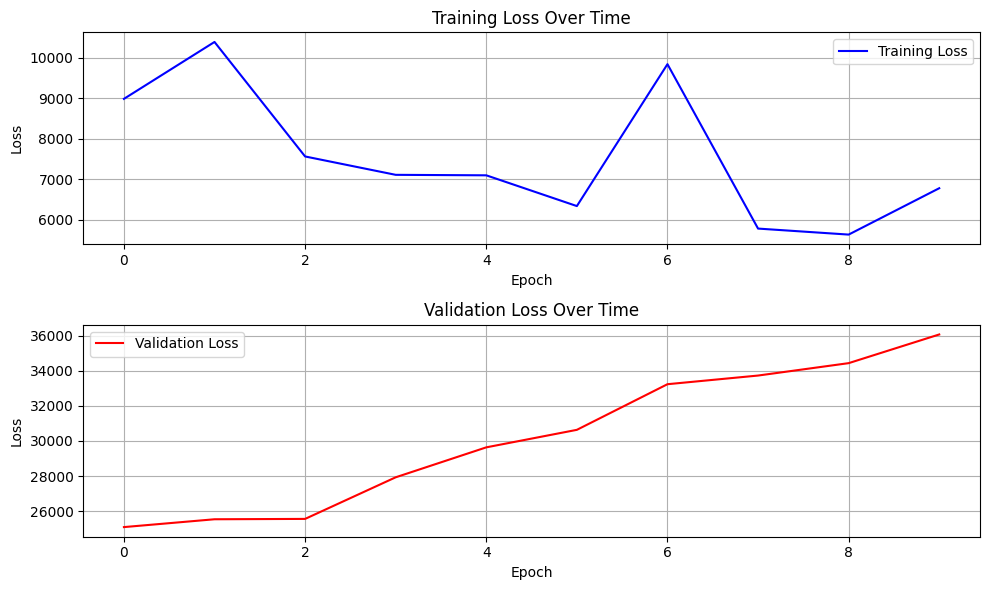

In [35]:
import matplotlib.pyplot as plt

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

# Training loss subplot
ax1.plot(history.history["loss"], label="Training Loss", color="blue")
ax1.set_title("Training Loss Over Time")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
ax1.grid(True)

# Validation loss subplot
ax2.plot(history.history["val_loss"], label="Validation Loss", color="red")
ax2.set_title("Validation Loss Over Time")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")
ax2.legend()
ax2.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
# plt.show() # Uncomment to show the plot

In [40]:
model_registry = project.get_model_registry()

In [43]:
query_model = hopsworks_integration.two_tower_serving.HopsworksQueryModel(
    model=model.query_model
)
query_model.register(
    model_registry=model_registry,
    feature_view=feature_view,
    query_df=dataset.properties["query_df"],
)

item_model = hopsworks_integration.two_tower_serving.HopsworksCandidateModel(
    model=model.item_model
)
item_model.register(
    model_registry=model_registry,
    feature_view=feature_view,
    item_df=dataset.properties["item_df"],
)

2025-07-29 19:09:12,993 INFO: Function `compute_embedding` contains input name(s) table_handle, 7087, resource with unsupported characters which will be renamed to query_tower_1_sequential_2_string_lookup_1_none_lookup_lookuptablefindv2_table_handle, query_tower_1_sequential_2_embedding_1_embedding_lookup_7087, query_tower_1_sequential_3_dense_3_biasadd_readvariableop_resource in the SavedModel.
2025-07-29 19:09:13,212 INFO: Assets written to: query_model/assets


  0%|          | 0/6 [00:00<?, ?it/s]

Uploading /Users/xayhanmonty/Desktop/smart-fit-recs/notebooks/query_model/fingerprint.pb: 0.000%|          | 0…

Uploading /Users/xayhanmonty/Desktop/smart-fit-recs/notebooks/query_model/saved_model.pb: 0.000%|          | 0…

Uploading /Users/xayhanmonty/Desktop/smart-fit-recs/notebooks/query_model/variables/variables.data-00000-of-00…

Uploading /Users/xayhanmonty/Desktop/smart-fit-recs/notebooks/query_model/variables/variables.index: 0.000%|  …

Uploading /Users/xayhanmonty/Desktop/smart-fit-recs/notebooks/input_example.json: 0.000%|          | 0/166 ela…

Uploading /Users/xayhanmonty/Desktop/smart-fit-recs/notebooks/model_schema.json: 0.000%|          | 0/852 elap…

Model created, explore it at https://c.app.hopsworks.ai:443/p/1239220/models/query_model/1
2025-07-29 19:09:34,962 INFO: Assets written to: candidate_model/assets


  0%|          | 0/6 [00:00<?, ?it/s]

Uploading /Users/xayhanmonty/Desktop/smart-fit-recs/notebooks/candidate_model/fingerprint.pb: 0.000%|         …

Uploading /Users/xayhanmonty/Desktop/smart-fit-recs/notebooks/candidate_model/saved_model.pb: 0.000%|         …

Uploading /Users/xayhanmonty/Desktop/smart-fit-recs/notebooks/candidate_model/variables/variables.data-00000-o…

Uploading /Users/xayhanmonty/Desktop/smart-fit-recs/notebooks/candidate_model/variables/variables.index: 0.000…

Uploading /Users/xayhanmonty/Desktop/smart-fit-recs/notebooks/input_example.json: 0.000%|          | 0/97 elap…

Uploading /Users/xayhanmonty/Desktop/smart-fit-recs/notebooks/model_schema.json: 0.000%|          | 0/852 elap…

Model created, explore it at https://c.app.hopsworks.ai:443/p/1239220/models/candidate_model/1


In [44]:
notebook_end_time = time.time()
notebook_execution_time = notebook_end_time - notebook_start_time

logger.info(
    f"⌛️ Notebook Execution time: {notebook_execution_time:.2f} seconds ~ {notebook_execution_time / 60:.2f} minutes"
)

2025-07-29 19:09:57.049 | INFO     | __main__:<module>:4 - ⌛️ Notebook Execution time: 3109.00 seconds ~ 51.82 minutes
